In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
word  = open('names.txt','r').read().splitlines()

In [4]:
# index all char 
chars = sorted(list(set(''.join(word)))) # make sorted list for all Alphabet in word dataset.
stoi  = {c:i+1 for i,c in enumerate(chars)} 
# hoin['<S>'] = 26
# choin['<E>'] = 27
stoi['.'] = 0

itos = {i+1:c for i,c in enumerate(chars)} 
# inoch[26] = '<S>'
# inoch[27] = '<E>'
itos[0] = '.'


In [4]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [30]:
# build DataSet 
block_window = 3 # Number of token (char) the model will see for predict
x ,y= [], []
for w in word[:5]:
    context = [0] * block_window # ...
    for c in w + '.':
        x.append(context)
        y.append(stoi[c])
        context.pop(0)
        context.append(stoi[c])
        
x = torch.tensor(x)
y = torch.tensor(y)

In [5]:
x.shape , x.dtype , y.shape , y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

### Building MLP

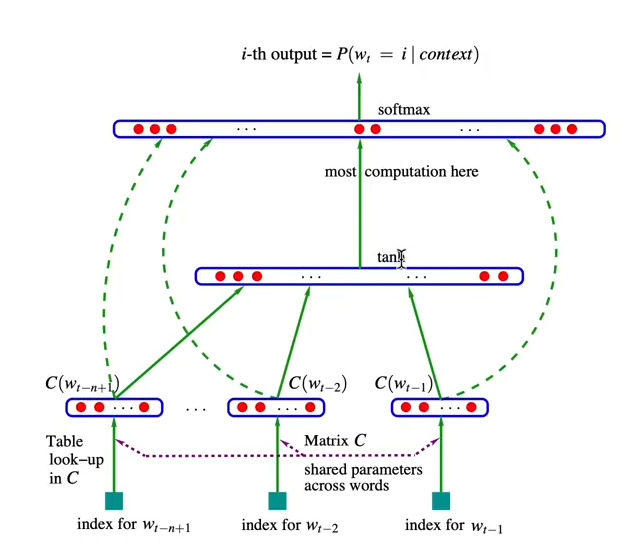


In [18]:
# Matric C our  looking up table 
C = torch.rand(27,2) # 2 is size of embeding vector we want

In [19]:
C[5]

tensor([0.3599, 0.0979])

In [20]:
# Other way using One-Hot-encoding
print(F.one_hot(torch.tensor(5), num_classes = 27)) 

# If we multiply One-Hot-encoding with C
print(F.one_hot(torch.tensor(5), num_classes = 27).float() @ C )  # We can Select the specific embeding in Matric C.

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])
tensor([0.3599, 0.0979])


In [26]:
# Different ways for indexing in pytorch
print( C[[1,2,3,8]] ,end='\n\n') # Using list

print( C[torch.tensor([1,2,3,8])] ,end='\n\n') # Using torch tensor

C[x[:3,:3]] # Using Multidimensional tensor.

tensor([[0.8130, 0.7538],
        [0.2511, 0.9614],
        [0.3786, 0.8363],
        [0.0986, 0.3114]])

tensor([[0.8130, 0.7538],
        [0.2511, 0.9614],
        [0.3786, 0.8363],
        [0.0986, 0.3114]])



tensor([[[0.9947, 0.8948],
         [0.8130, 0.7538],
         [0.9238, 0.8314]],

        [[0.9947, 0.8948],
         [0.8130, 0.7538],
         [0.9238, 0.8314]],

        [[0.9947, 0.8948],
         [0.8130, 0.7538],
         [0.9238, 0.8314]]])

In [27]:
C[x].shape # 32 -> example , 3 -> input token , 2 -> embeding vector

torch.Size([32, 3, 2])

In [58]:
print(x[5,0]) # example 5 - input 0
print()
# So if we want to looking up for specific input
print(C[9]) # we can use Matric C (must now specific input)
C[x[5,0]]   # Or just now the Location of it at dataset.


tensor(9)

tensor([0.6042, 0.2808])


tensor([0.6042, 0.2808])

In [59]:
embd = C[x]

In [61]:
w1 = torch.rand(6,100)
b1 = torch.rand(100)

In [62]:
# We need stack all embed vector Vertically for each example
(torch.cat([embd[:,0,:],embd[:,1,:],embd[:,2,:]],1) @ w1 + b1) # One way use cat function

tensor([[3.7173, 3.8354, 3.5384,  ..., 3.2428, 2.5415, 2.4207],
        [3.7173, 3.8354, 3.5384,  ..., 3.2428, 2.5415, 2.4207],
        [3.7173, 3.8354, 3.5384,  ..., 3.2428, 2.5415, 2.4207],
        ...,
        [2.8711, 3.6046, 2.9431,  ..., 2.4785, 2.3842, 2.2336],
        [2.8711, 3.6046, 2.9431,  ..., 2.4785, 2.3842, 2.2336],
        [2.8711, 3.6046, 2.9431,  ..., 2.4785, 2.3842, 2.2336]])

In [67]:
# More General way
(torch.cat(torch.unbind(embd,dim=1),1) @ w1 + b1) # Unbind just spilt tensor in one dim


tensor([[3.7173, 3.8354, 3.5384,  ..., 3.2428, 2.5415, 2.4207],
        [3.7173, 3.8354, 3.5384,  ..., 3.2428, 2.5415, 2.4207],
        [3.7173, 3.8354, 3.5384,  ..., 3.2428, 2.5415, 2.4207],
        ...,
        [2.8711, 3.6046, 2.9431,  ..., 2.4785, 2.3842, 2.2336],
        [2.8711, 3.6046, 2.9431,  ..., 2.4785, 2.3842, 2.2336],
        [2.8711, 3.6046, 2.9431,  ..., 2.4785, 2.3842, 2.2336]])

In [70]:
(embd.view(-1,6) @ w1 + b1) # The Efficient way because not created new storge

tensor([[3.7173, 3.8354, 3.5384,  ..., 3.2428, 2.5415, 2.4207],
        [3.7173, 3.8354, 3.5384,  ..., 3.2428, 2.5415, 2.4207],
        [3.7173, 3.8354, 3.5384,  ..., 3.2428, 2.5415, 2.4207],
        ...,
        [2.8711, 3.6046, 2.9431,  ..., 2.4785, 2.3842, 2.2336],
        [2.8711, 3.6046, 2.9431,  ..., 2.4785, 2.3842, 2.2336],
        [2.8711, 3.6046, 2.9431,  ..., 2.4785, 2.3842, 2.2336]])

In [71]:
h = torch.tanh((embd.view(-1,6) @ w1 + b1))

In [72]:
w2 = torch.rand(100,27)
b2 = torch.rand(27)

In [74]:
logits = h @ w2 + b2

In [84]:
logits # shape 32 , 27

tensor([[47.9253, 45.4296, 52.6930, 44.1298, 51.1551, 49.1310, 51.0395, 48.6358,
         45.3433, 52.6002, 51.3510, 50.0310, 51.9332, 49.5047, 52.5831, 46.0849,
         48.2275, 47.1777, 52.6095, 51.7085, 49.0915, 52.2992, 53.8611, 47.8182,
         52.4263, 52.4699, 52.1311],
        [47.9253, 45.4296, 52.6930, 44.1298, 51.1551, 49.1310, 51.0395, 48.6358,
         45.3433, 52.6002, 51.3510, 50.0310, 51.9332, 49.5047, 52.5831, 46.0849,
         48.2275, 47.1777, 52.6095, 51.7085, 49.0915, 52.2992, 53.8611, 47.8182,
         52.4263, 52.4699, 52.1311],
        [47.9253, 45.4296, 52.6930, 44.1298, 51.1551, 49.1310, 51.0395, 48.6358,
         45.3433, 52.6002, 51.3510, 50.0310, 51.9332, 49.5047, 52.5831, 46.0849,
         48.2275, 47.1777, 52.6095, 51.7085, 49.0915, 52.2992, 53.8611, 47.8182,
         52.4263, 52.4699, 52.1311],
        [47.9253, 45.4296, 52.6930, 44.1298, 51.1551, 49.1310, 51.0395, 48.6358,
         45.3433, 52.6002, 51.3510, 50.0310, 51.9332, 49.5047, 52.5831, 46.0849

In [76]:
# Softmax 

counts = logits.exp()
prob = counts / counts.sum(axis=1,keepdims=True)

In [86]:
prob[0].sum(),prob.shape # must be one

(tensor(1.), torch.Size([32, 27]))

In [80]:
loss = -prob[torch.arange(32),y].log().mean()
loss

tensor(6.0004)

In [81]:
prob

tensor([[7.4030e-04, 6.1036e-05, 8.7096e-02, 1.6637e-05, 1.8712e-02, 2.4721e-03,
         1.6669e-02, 1.5066e-03, 5.5987e-05, 7.9378e-02, 2.2761e-02, 6.0806e-03,
         4.0744e-02, 3.5923e-03, 7.8037e-02, 1.1753e-04, 1.0015e-03, 3.5056e-04,
         8.0119e-02, 3.2544e-02, 2.3763e-03, 5.8746e-02, 2.8011e-01, 6.6516e-04,
         6.6711e-02, 6.9679e-02, 4.9659e-02],
        [7.4030e-04, 6.1036e-05, 8.7096e-02, 1.6637e-05, 1.8712e-02, 2.4721e-03,
         1.6669e-02, 1.5066e-03, 5.5987e-05, 7.9378e-02, 2.2761e-02, 6.0806e-03,
         4.0744e-02, 3.5923e-03, 7.8037e-02, 1.1753e-04, 1.0015e-03, 3.5056e-04,
         8.0119e-02, 3.2544e-02, 2.3763e-03, 5.8746e-02, 2.8011e-01, 6.6516e-04,
         6.6711e-02, 6.9679e-02, 4.9659e-02],
        [7.4030e-04, 6.1036e-05, 8.7096e-02, 1.6637e-05, 1.8712e-02, 2.4721e-03,
         1.6669e-02, 1.5066e-03, 5.5987e-05, 7.9378e-02, 2.2761e-02, 6.0806e-03,
         4.0744e-02, 3.5923e-03, 7.8037e-02, 1.1753e-04, 1.0015e-03, 3.5056e-04,
         8.0119e-

In [5]:
##########################################################################
################################# MLP ####################################
##########################################################################

In [33]:
# build DataSet 
SEED = 2147483647 
bw = 3 # Number of token (char) the model will see for predict (block window)
def build_dataset(word):
    x , y= [], []
    for w in word:
        context = [0] * bw # ...
        for c in w + '.':
            x.append(context)
            y.append(stoi[c])
            context = context[1:] + [ix]
    return torch.tensor(x),torch.tensor(y)        
random.seed(42)        
random.shuffle(word)

idx_train =  int(len(word) * 0.80) 
idx_dev   =  int(len(word) * 0.90)
X,y = build_dataset(word)
X_train , y_train = build_dataset(word[:idx_train])
X_dev   , y_dev = build_dataset(word[idx_train:idx_dev])
X_test  , y_test = build_dataset(word[idx_dev:])

In [41]:
def inti_parameters():
    evs = 10  # Embedding vector size
    g = torch.Generator().manual_seed(SEED)
    C = torch.rand((27,evs),generator=g)
    W1 = torch.rand(((evs * bw),200),generator=g)
    b1 = torch.rand(200,generator=g)
    W2 = torch.rand((200,27),generator=g)
    b2 = torch.rand(27,generator=g)
    parameters = [C,W1,b1,W2,b2]

    for p in parameters:
        p.requires_grad = True

    return evs,g,C,W1,b1,W2,b2,parameters

evs, g, C, W1, b1, W2, b2, parameters = inti_parameters()

In [60]:
print(f" Number model parameters: {sum(p.nelement() for p in parameters)}")

 Number model parameters: 11897


In [43]:
# Training (BGD - Batch Gradient descent)
for _ in range(101):

    # forwardpass
    emb = C[X_train]
    h = torch.tanh(emb.view(-1,(evs * bw)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,y_train)

    for p in parameters:
     p.grad = None

    loss.backward()

    # backwardpass
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    if _ % 10 == 0:    
        print(f"step :{_} - loss :{loss.item()}")


step :0 - loss :6.471521854400635
step :10 - loss :3.1817405223846436
step :20 - loss :2.8852486610412598
step :30 - loss :3.015828847885132
step :40 - loss :2.916005849838257
step :50 - loss :3.0397064685821533
step :60 - loss :2.914734363555908
step :70 - loss :3.042433023452759
step :80 - loss :2.9002747535705566
step :90 - loss :3.021364450454712
step :100 - loss :2.9228596687316895


- Using Full Batch Gradient descent is Slow in Training.
- Will use Mini-Batch Gradient descent and Tune tune lr


In [50]:
evs, g, C, W1, b1, W2, b2, parameters = inti_parameters()

In [51]:
# Training (BGD - Mini-Batch Gradient descent)
for _ in range(101):

    idx = torch.randint(0,X_train.shape[0],(32,)) # Batch index 

    # forwardpass
    emb = C[X_train[idx]]
    h = torch.tanh(emb.view(-1,(evs * bw)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,y_train[idx])

    for p in parameters:
     p.grad = None

    loss.backward()

    # backwardpass
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    if _ % 10 == 0:    
     print(f"step :{_} - loss :{loss.item()}")


step :0 - loss :6.28492546081543
step :10 - loss :3.6005115509033203
step :20 - loss :3.8377888202667236
step :30 - loss :5.124606132507324
step :40 - loss :3.670201539993286
step :50 - loss :6.119725704193115
step :60 - loss :3.9942386150360107
step :70 - loss :4.031366348266602
step :80 - loss :3.7762153148651123
step :90 - loss :3.7140443325042725
step :100 - loss :3.8124473094940186


- Tuing the a learning rate.


In [63]:
evs, g, C, W1, b1, W2, b2, parameters = inti_parameters()
lre = torch.linspace(-3,0,1000)
lrs  = 10 ** lre 

In [58]:
# Training (BGD - Mini-Batch Gradient descent)
 
lri,lossi = [],[]


for i in range(1000):

    idx = torch.randint(0,X.shape[0],(32,)) # Batch index 

    # forwardpass
    emb = C[X[idx]]
    h = torch.tanh(emb.view(-1,(evs * bw)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,y[idx])
    print(loss.item())
    for p in parameters:
     p.grad = None

    loss.backward()

    # backwardpass
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    lri.append(lr)
    lossi.append(loss.item())


7.625404357910156
6.703637599945068
5.328675746917725
6.15674352645874
6.71612024307251
7.426243782043457
5.212507247924805
5.585063457489014
7.267561912536621
7.173820972442627
5.108086109161377
5.119573593139648
4.902393341064453
6.394667148590088
5.237340927124023
5.202616214752197
4.893218517303467
4.0210394859313965
4.1803765296936035
5.649767875671387
4.099360942840576
6.689092636108398
6.5319366455078125
4.516411781311035
6.24232292175293
4.5707526206970215
5.393040180206299
5.185545444488525
4.900946140289307
3.862924575805664
4.687328338623047
3.7764008045196533
4.96714973449707
4.595250606536865
5.772690296173096
5.945385932922363
6.079929828643799
5.722162246704102
5.431150913238525
5.643855571746826
6.262079238891602
5.854146480560303
4.982870101928711
5.13058614730835
6.775576114654541
4.903481960296631
5.087955474853516
6.954686641693115
4.7077531814575195
3.0681378841400146
4.963352203369141
5.642185211181641
4.8449931144714355
4.906497478485107
6.677237510681152
4.26427

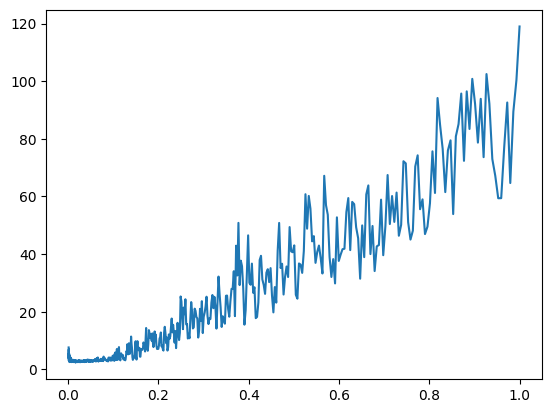

In [59]:
plt.plot(lri, lossi)

In [64]:
# Training (BGD - Mini-Batch Gradient descent)
lri = []
lossi = []
stepi = []

for i in range(200000):

    idx = torch.randint(0,X_train.shape[0],(32,)) # Batch index 

    # forwardpass
    emb = C[X_train[idx]]
    h = torch.tanh(emb.view(-1,(evs * bw)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,y_train[idx])

    for p in parameters:
     p.grad = None

    loss.backward()

    # backwardpass
    lr = 0.01 if i < 100000 else 0.001 # Learning rate decay
    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(i)
    lossi.append(loss.log10().item())


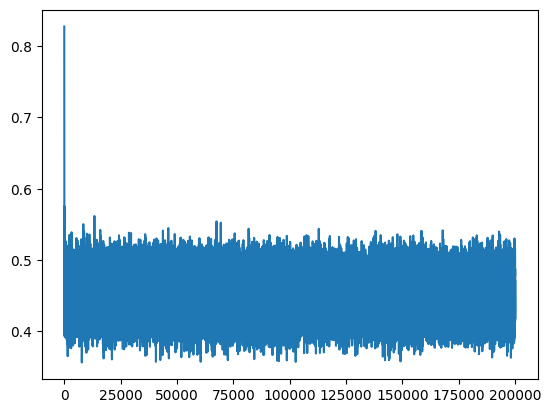

In [65]:
plt.plot(stepi, lossi)

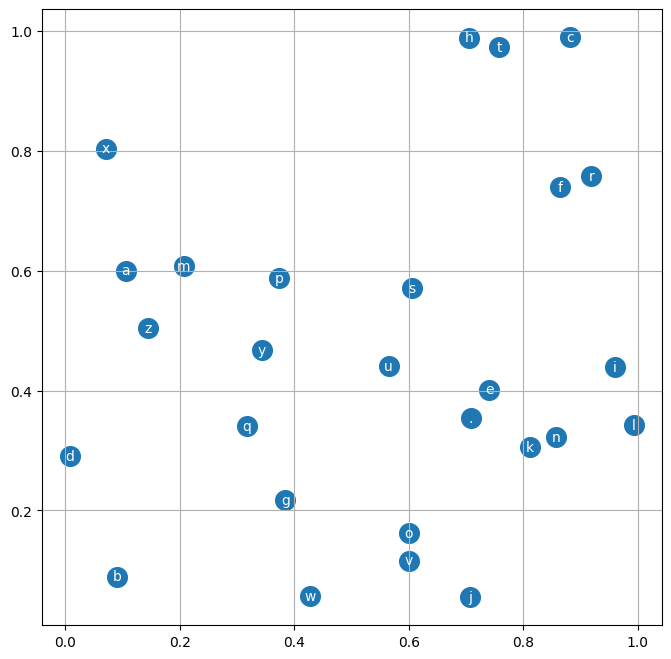

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [66]:
# training loss 
emb = C[X_train] # (32, 3, 2)
h = torch.tanh(emb.view(-1,(evs * bw)) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, y_train)
loss

tensor(2.8230, grad_fn=<NllLossBackward0>)

In [67]:
# Vaildation loss 
emb = C[X_dev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,(evs * bw)) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, y_dev)
loss

tensor(2.8245, grad_fn=<NllLossBackward0>)

In [68]:
# test loss 
emb = C[X_test] # (32, 3, 2)
h = torch.tanh(emb.view(-1,(evs * bw)) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, y_test)
loss

tensor(2.8265, grad_fn=<NllLossBackward0>)

In [69]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * bw 
    while True:
      emb = C[torch.tensor([context])] 
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

ernaaimyaahreelmnd.
ryal.
retmrsjejdrleg.
adeeedieliihemi.
realeieiseananarneatzimhlkaa.
n.
sadbvrgahimies.
.
n.
ir.
eelklxnteuoanu.
amnedar.
yihle.
ehs.
laaja.
sknyaa.
hia.
nalyaisun.
zajhlveuren.
.


Exercises:
- E01: Tune the hyperparameters of the training to beat my best validation loss of 2.2
- E02: I was not careful with the intialization of the network in this video. (1) What is the loss you'd get if the predicted probabilities at initialization were perfectly uniform? What loss do we achieve? (2) Can you tune the initialization to get a starting loss that is much more similar to (1)?
- E03: Read the Bengio et al 2003 paper (link above), implement and try any idea from the paper. Did it work?
